In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


In [ ]:

iris = load_iris()
X = iris.data
y = iris.target


In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:

dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)


Decision Tree Accuracy: 1.0
Logistic Regression Accuracy: 1.0
KNN Accuracy: 1.0


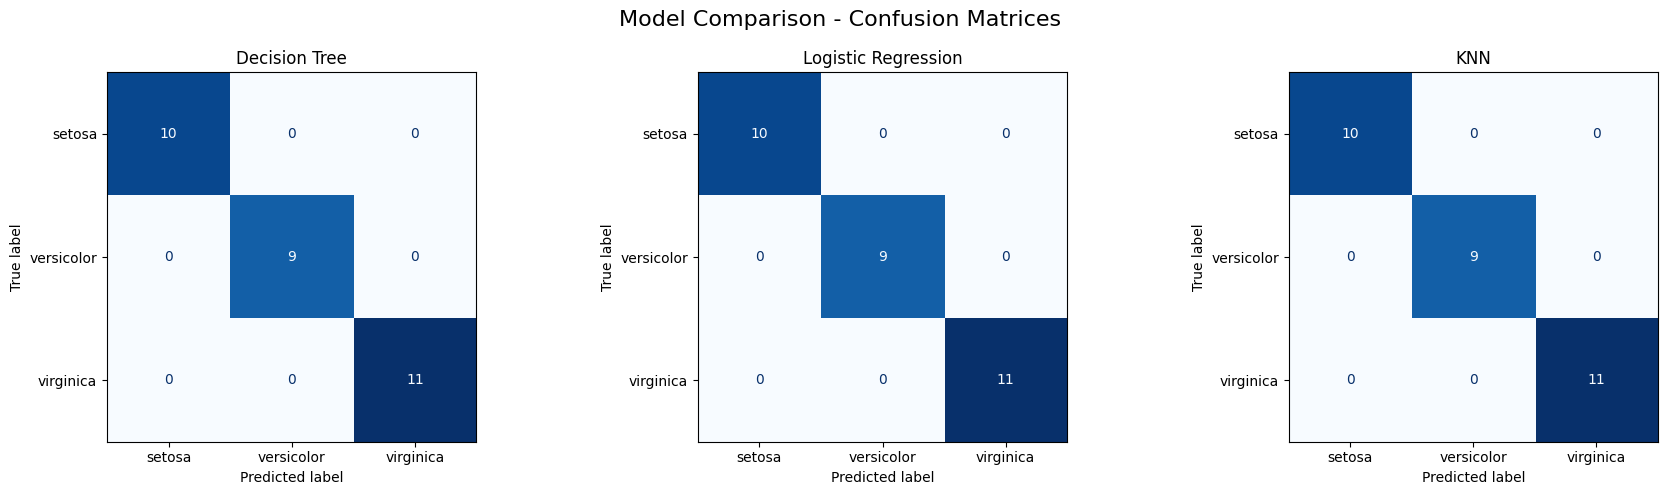

In [ ]:

print("Decision Tree Accuracy:", acc_tree)
print("Logistic Regression Accuracy:", acc_logreg)
print("KNN Accuracy:", acc_knn)

models = ['Decision Tree', 'Logistic Regression', 'KNN']
preds = [y_pred_tree, y_pred_logreg, y_pred_knn]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i in range(3):
    cm = confusion_matrix(y_test, preds[i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(ax=axes[i], cmap=plt.cm.Blues, colorbar=False)
    axes[i].set_title(models[i])

plt.suptitle("Model Comparison - Confusion Matrices", fontsize=16)
plt.tight_layout()
plt.show()

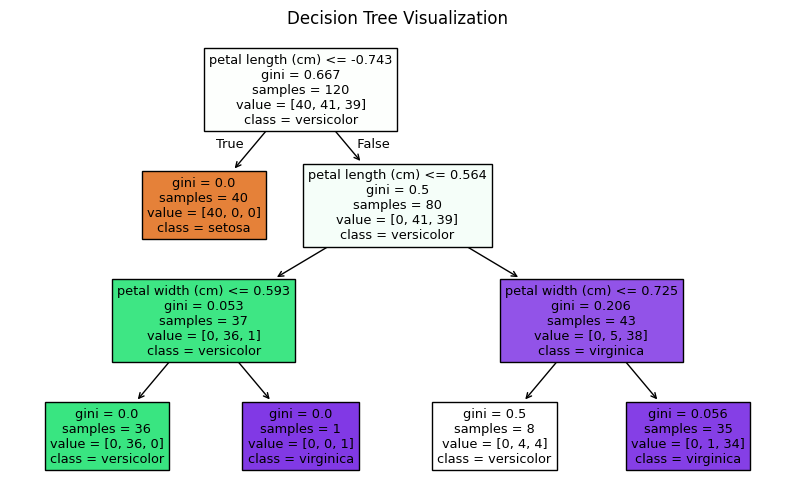

In [ ]:

plt.figure(figsize=(10, 6))
plot_tree(dtree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:

# classification reports
print("\n--- Classification Report: Decision Tree ---")
print(classification_report(y_test, y_pred_tree, target_names=iris.target_names))

print("\n--- Classification Report: Logistic Regression ---")
print(classification_report(y_test, y_pred_logreg, target_names=iris.target_names))

print("\n--- Classification Report: K-Nearest Neighbors ---")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))



--- Classification Report: Decision Tree ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


--- Classification Report: Logistic Regression ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


--- Classification Report: K-Nearest Neighbors ---
              precision    recall  f1-score   support

      setosa       1.00      1.00